In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ACA PROCEDEREMOS A ANALIZAR NUESTROS DATASETS YA LIMPIOS, REALIZANDO EDA A CADA UNO Y POR ULTIMO ESCOGEREMOS NUESTRAS VARIABLES PARA EL POSTERIOR ESTUDIO DE NUESTRO MODELO

* EDA del dataset user_reviews

In [7]:
# Se leen los datos de .csv y se guarda en un dataframe.
%cd C:\\Users\\Familia Lara Pernia\\Desktop\\Henry\\Proyectos Individuales\\Proyecto1_Steam_Games\\archivos csv
df_reviews = pd.read_csv('df_reviews.csv', encoding='utf-8')
df_reviews.head()

C:\Users\Familia Lara Pernia\Desktop\Henry\Proyectos Individuales\Proyecto1_Steam_Games\archivos csv


,user_id,user_url,reviews_posted,reviews_item_id,reviews_helpful,reviews_recommend,sentiment_analysis,año_lanzamiento
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted November 5, 2011.",1250,No ratings yet,True,2,2009
1,EndAtHallow,http://steamcommunity.com/id/EndAtHallow,"Posted January 15, 2015.",1250,No ratings yet,True,2,2009
2,76561198107847795,http://steamcommunity.com/profiles/76561198107...,"Posted December 12, 2014.",1250,No ratings yet,True,1,2009
3,usaidwotnow,http://steamcommunity.com/id/usaidwotnow,"Posted December 13, 2013.",1250,0 of 1 people (0%) found this review helpful,True,0,2009
4,76561198081529182,http://steamcommunity.com/profiles/76561198081...,"Posted August 19, 2014.",1250,2 of 3 people (67%) found this review helpful,True,2,2009


Se revisan los tipos de datos y cantidad de nulos si hay.

In [8]:
# Se calcula la cantidad de registros
print(f'La cantidad de registros que hay son: {df_reviews.shape[0]}')
# Se revisan tipos de datos y existencias de nulos
df_reviews.info()

La cantidad de registros que hay son: 50218
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50218 entries, 0 to 50217
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             50218 non-null  object
 1   user_url            50218 non-null  object
 2   reviews_posted      50218 non-null  object
 3   reviews_item_id     50218 non-null  int64 
 4   reviews_helpful     50218 non-null  object
 5   reviews_recommend   50218 non-null  bool  
 6   sentiment_analysis  50218 non-null  int64 
 7   año_lanzamiento     50218 non-null  int64 
dtypes: bool(1), int64(3), object(4)
memory usage: 2.7+ MB


Se tienen 50217 registros de opiniones de los usuarios respecto a los juegos que consumen. Comprobamos que tenemos una sola fila con datos nulos, se podria eliminar, aunque no va a cambiar mucho nuestro analisis.

Columnas 'sentiment_analysis' y 'reviews_recommend'

Se exploran las columnas 'sentiment_analysis' y 'reviews_recommend'.

En el siguiente código se busca ver la cantidad de recomendaciones para los distintos sentimientos de las reviews

In [9]:
# Se agrupa por 'sentiment_analysis' y 'reviews_recommend'
df_agrupado = df_reviews.groupby(['sentiment_analysis', 'reviews_recommend'])
# Se cuentan la cantidad de reviews en cada grupo
cantidad_grupo = df_agrupado.size()
# Se calcula el porcentaje por cada grupo
porcentaje_grupo = 100 * df_agrupado.size() / len(df_reviews)
# Se crea un datafram con el resumen
sentimiento_recomendacion = pd.DataFrame({
    "Cantidad": cantidad_grupo,
    "Porcentaje": porcentaje_grupo
})
sentimiento_recomendacion

Cantidad  Porcentaje
sentiment_analysis reviews_recommend                      
0                  False                  2665    5.306862
                   True                   8033   15.996256
1                  False                  1149    2.288024
                   True                   9693   19.301844
2                  False                  1530    3.046716
                   True                  27148   54.060297

Se puede ver que el porcentaje respecto del total de los reviews demuestra que el 54% de los reviews que reflejan un sentimiento positivo recomiendan un juego, por lo que un sentimiento positivo podría estar relacionado con la intencion de dejar una recomendacion del juego. Por otra parte, de los comentarios que reflejaron un sentimiento negativo cerca del 6% aún recomienda el juego, lo que es algo contradictorio, ya que los sentimientos negativos normalmente son expresados en estas plataformas.

Resulta interesante tambien señalar que el porcentaje mas bajo del total de recomendaciones fue del 2%, relacionado con un sentimiento neutral donde las personas decidieron no recomendar, a pesar de estar en dichas condiciones de sentimiento, indica esto que la neutralidad se inclina mas a dejar una recomendacion.

* EDA del dataset steam_games

En esta sección se desarrolla el Análisis Exploratorio de los Datos del conjunto steam_games que ya pasó por el proceso de ETL.

In [14]:
#leemos el dataseet
%cd C:\\Users\\Familia Lara Pernia\\Desktop\\Henry\\Proyectos Individuales\\Proyecto1_Steam_Games\\archivos csv
df_games = pd.read_csv('steam_games_limpio.csv', encoding='utf-8')
df_games.head()

C:\Users\Familia Lara Pernia\Desktop\Henry\Proyectos Individuales\Proyecto1_Steam_Games\archivos csv


,publisher,genres,app_name,title,price,early_access,id,developer,año_lanzamiento
0,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,4.99,0.0,761140,Kotoshiro,2018.0
1,Kotoshiro,Casual,Lost Summoner Kitty,Lost Summoner Kitty,4.99,0.0,761140,Kotoshiro,2018.0
2,Kotoshiro,Indie,Lost Summoner Kitty,Lost Summoner Kitty,4.99,0.0,761140,Kotoshiro,2018.0
3,Kotoshiro,Simulation,Lost Summoner Kitty,Lost Summoner Kitty,4.99,0.0,761140,Kotoshiro,2018.0
4,Kotoshiro,Strategy,Lost Summoner Kitty,Lost Summoner Kitty,4.99,0.0,761140,Kotoshiro,2018.0


Se revisan los tipos de datos y cantidad de nulos si hay.

In [15]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71552 entries, 0 to 71551
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   publisher        59066 non-null  object 
 1   genres           71552 non-null  object 
 2   app_name         71550 non-null  object 
 3   title            71550 non-null  object 
 4   price            71552 non-null  float64
 5   early_access     71552 non-null  float64
 6   id               71552 non-null  int64  
 7   developer        71318 non-null  object 
 8   año_lanzamiento  70702 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 4.9+ MB


Aca podemos observa que la columna "publisher posee una gran cantidad de nulos y que ademas ya en el ETL se observo que posee los mismos datos de la columna "developer", por esto procederemos a eliminarla ya que no afectaria en nada nuestro posterior estudio.

Ademas eliminaramos la fila que en todo sus datos posee nulos.

In [16]:
#Eliminamos columna 'publisher'
df_games=df_games.drop('publisher', axis=1)
#eliminamos fila que posee solo nulos
df_games = df_games.dropna()

df_games


,genres,app_name,title,price,early_access,id,developer,año_lanzamiento
0,Action,Lost Summoner Kitty,Lost Summoner Kitty,4.99,0.0,761140,Kotoshiro,2018.0
1,Casual,Lost Summoner Kitty,Lost Summoner Kitty,4.99,0.0,761140,Kotoshiro,2018.0
2,Indie,Lost Summoner Kitty,Lost Summoner Kitty,4.99,0.0,761140,Kotoshiro,2018.0
3,Simulation,Lost Summoner Kitty,Lost Summoner Kitty,4.99,0.0,761140,Kotoshiro,2018.0
4,Strategy,Lost Summoner Kitty,Lost Summoner Kitty,4.99,0.0,761140,Kotoshiro,2018.0
...,...,...,...,...,...,...,...,...
71547,Indie,Russian Roads,Russian Roads,1.99,0.0,610660,Laush Dmitriy Sergeevich,2018.0
71548,Racing,Russian Roads,Russian Roads,1.99,0.0,610660,Laush Dmitriy Sergeevich,2018.0
71549,Simulation,Russian Roads,Russian Roads,1.99,0.0,610660,Laush Dmitriy Sergeevich,2018.0
71550,Casual,EXIT 2 - Directions,EXIT 2 - Directions,4.99,0.0,658870,"xropi,stev3ns",2017.0


Columnas 'id', 'app_name' y 'title'

Estas columnas hacen referencia al identificador único del juego y los nombres de la aplicación y del título del juego. Estos últimos no tienen mayor información que analizar en este momento. Con el 'id' se puede calcular la cantidad de juegos.

In [17]:
total_juegos = len(df_games['id'].unique())
print(f"El total de juegos que hay registrados son: {total_juegos}")

El total de juegos que hay registrados son: 28430


Columna 'genres'

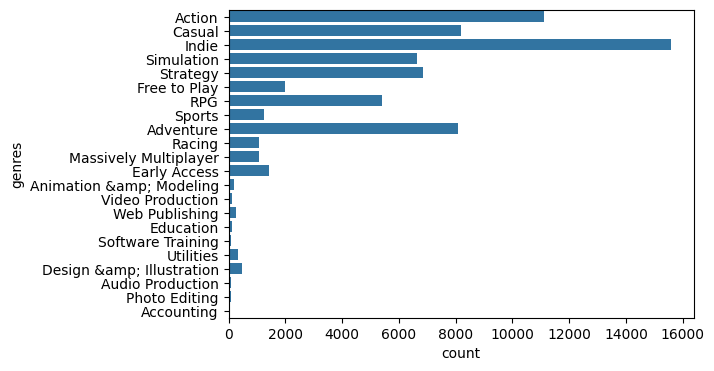

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_games, y='genres', orient='h')
plt.show()

Los juegos estan categorizados mayormente en las categorías Indie, Action, Casual y Adventure. Cabe recordar que un juego puede tener mas de un género asociado.

Columna 'año_lanzamiento'

Construiremos una grafica de barras para observar la cantidad de registros por año

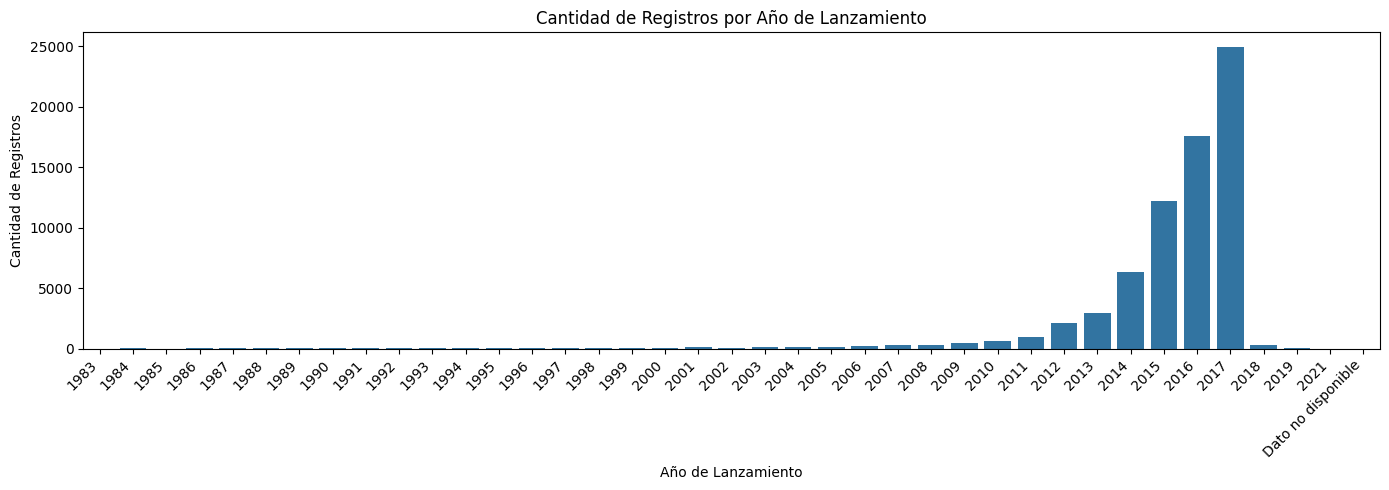

In [25]:
# Convierto a str la columna 'año_lazamiento'
df_games['año_lanzamiento'] = df_games['año_lanzamiento'].astype(str)

# Cuenta la frecuencia de cada año
conteo_anios = df_games['año_lanzamiento'].value_counts()

# Ordena los valores para que 'Datos no disponibles' queden al principio o al final
conteo_anios = conteo_anios.reindex(['Dato no disponible'] + list(conteo_anios.index))
# Ordena los valores por año
conteo_anios = conteo_anios.sort_index()

# Crear la gráfica de barras
plt.figure(figsize=(14, 5))
sns.barplot(x=conteo_anios.index, y=conteo_anios.values)
plt.xlabel('Año de Lanzamiento') ; plt.ylabel('Cantidad de Registros') ; plt.title('Cantidad de Registros por Año de Lanzamiento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Se pueden ver  juegos lanzados en años anteriores al 2002 lo que puede ser un error porque la plataforma se lanzó en el 2003. Por otra parte. Luego se ve el crecimiento constante y lento hasta 2012 y luego crece mas rápidamente hasta 2017. A partir de allí, la plataforma limitó la forma de obtener las estadísticas, por eso se ven muchos menos registros.

* EDA del dataset users_items

En esta sección se desarrolla el Análisis Exploratorio de los Datos del conjunto users_items que ya pasó por el proceso de ETL.

In [31]:
%cd C:\\Users\\Familia Lara Pernia\\Desktop\\Henry\\Proyectos Individuales\\Proyecto1_Steam_Games\\archivos csv
df_items = pd.read_csv('users_items_limpio.csv', encoding='utf-8')
df_items.head()

C:\Users\Familia Lara Pernia\Desktop\Henry\Proyectos Individuales\Proyecto1_Steam_Games\archivos csv


,item_id,item_name,playtime_forever,steam_id,items_count,user_id,user_url
0,10,Counter-Strike,6,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,30,Day of Defeat,7,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,40,Deathmatch Classic,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
4,50,Half-Life: Opposing Force,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...


Se revisan los tipos de datos y cantidad de nulos si hay.

In [32]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094105 entries, 0 to 5094104
Data columns (total 7 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           int64 
 1   item_name         object
 2   playtime_forever  int64 
 3   steam_id          int64 
 4   items_count       int64 
 5   user_id           object
 6   user_url          object
dtypes: int64(4), object(3)
memory usage: 272.1+ MB


Este conjunto de datos tiene 7 columnas y 5094104 registros. Para recordar, contiene la información relacionada los usuarios y los juegos que consumen como el tiempo acumulado (en minutos) que han jugado a un juego, la cantidad de items que consumen así como los identificadores de los juegos que consumen y del propio usuario y la url del perfil del mismo.

Columna 'playtime_forever'

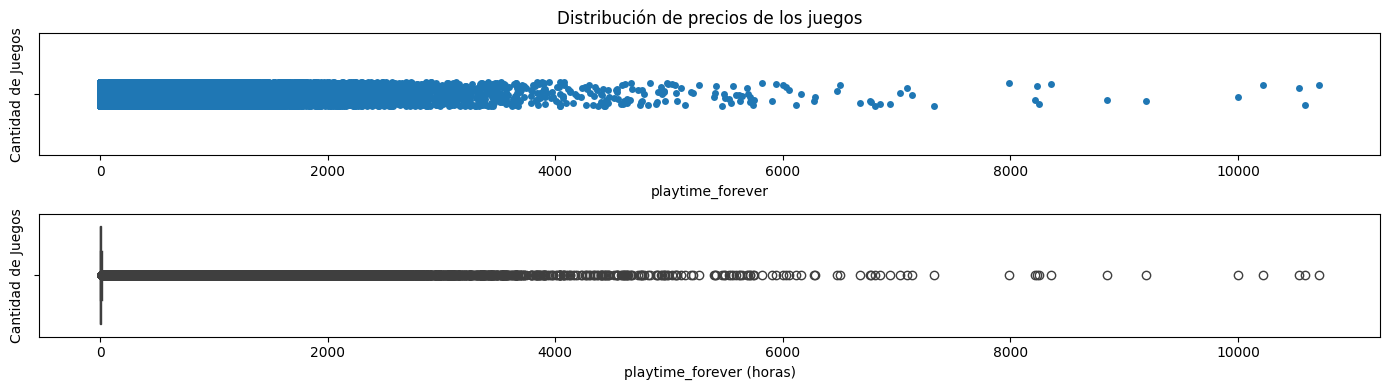

In [33]:
df_items['playtime_hours'] = df_items['playtime_forever'] / 60

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=df_items, x='playtime_hours', ax=ax1)
ax1.set_xlabel('playtime_forever') ; ax1.set_ylabel('Cantidad de Juegos') ; ax1.set_title('Distribución de precios de los juegos')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=df_items, x='playtime_hours', ax=ax2)
ax2.set_xlabel('playtime_forever (horas)') ; ax2.set_ylabel('Cantidad de Juegos')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [34]:
estadisticas = df_items['playtime_hours'].describe()
print(f'El precio medio (mediana) de los juegos es de: {round(estadisticas[5],2)}')
print(f'El precio promedio (mean) de los juegos es de: {round(estadisticas[1],2)}')
print(f'El 75% de los juegos tienen un precio menor de: {round(estadisticas[6],2)}')

El precio medio (mediana) de los juegos es de: 0.57
El precio promedio (mean) de los juegos es de: 16.51
El 75% de los juegos tienen un precio menor de: 5.92


Se puede observar que cada usuario, por juego, pasa un tiempo medio de 0.57 hs jugando y el 75% de los jugadores estuvieron menos de 6 hs jugando a un juego, pero se observa una gran cantidad de valores atípicos por encima de las 14.79 hs que juega cada usuario a un juego. Esto podría deberse al uso de bots que utilizan el mismo perfil de usuario para jugar en simultaneo, lo que generaría una distorsión de los tiempos reales de juego

Columna 'items_count'

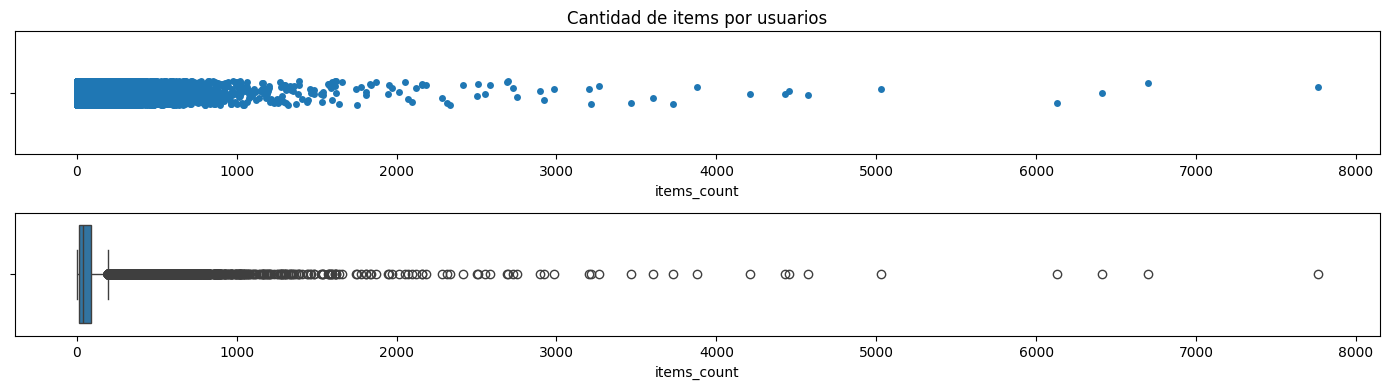

In [35]:
# Agrupa por usuario la cantidad de items, lo conviente en data frame y los ordena de mayor a menor
items_count_user = df_items.groupby('user_id')['items_count'].unique().explode()
items_count_user = pd.DataFrame(items_count_user)
items_count_user_o = items_count_user.sort_values('items_count', ascending=False)

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=items_count_user_o, x='items_count', ax=ax1)
ax1.set_xlabel('items_count') ; ax1.set_title('Cantidad de items por usuarios')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=items_count_user_o, x='items_count', ax=ax2)
ax2.set_xlabel('items_count')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [36]:
estadisticas = items_count_user['items_count'].astype(float).describe()
print(f'El precio medio (mediana) de los juegos es de: {round(estadisticas[5],2)}')
print(f'El precio promedio (mean) de los juegos es de: {round(estadisticas[1],2)}')
print(f'El 75% de los juegos tienen un precio menor de: {round(estadisticas[6],2)}')

El precio medio (mediana) de los juegos es de: 40.0
El precio promedio (mean) de los juegos es de: 71.84
El 75% de los juegos tienen un precio menor de: 87.0


<Figure size 1400x500 with 0 Axes>

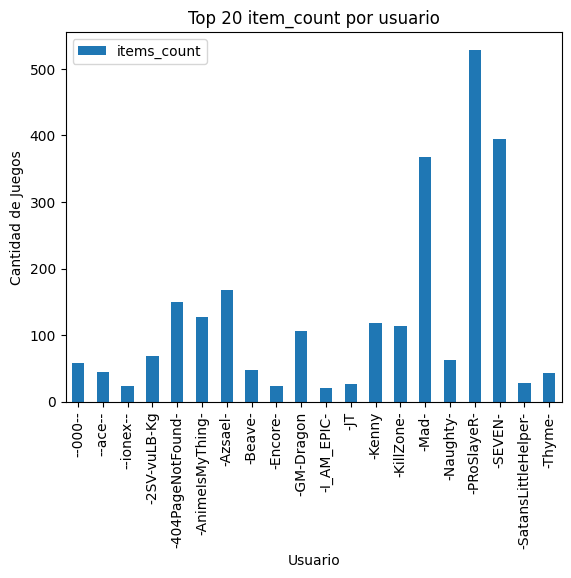

In [37]:
# Grafica cantidad de item por usuarios
plt.figure(figsize=(14, 5))
items_count_user[:20].plot(kind='bar')
plt.xlabel('Usuario') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 20 item_count por usuario')
plt.show()

Se puede ver que el usuario que mas cantidad de juegos a consumido ronda los 8000 juegos, pero el 75% de los usuarios ha adquirido menos de 87 items. Se pueden ver 4957 usuarios que hay adquirido mas de 196 items que podrían considerarse como atípicos.

* Elección de las variables a usar en el modelo de recomendación

Para el modelo de recomndación se busca como resultado la recomendación un una lista de 5 juegos a partir de indicar el nombre de un juego o el id de un usuario, basado en un puntaje que se debe decidir cómo crearlo. Para ello, se revisan los dataframe df_reviews y df_items analizados anteriormente.

In [38]:
%cd C:\\Users\\Familia Lara Pernia\\Desktop\\Henry\\Proyectos Individuales\\Proyecto1_Steam_Games\\archivos csv
df_items = pd.read_csv('users_items_limpio.csv', encoding='utf-8')
df_reviews = pd.read_csv('df_reviews.csv', encoding='utf-8')


C:\Users\Familia Lara Pernia\Desktop\Henry\Proyectos Individuales\Proyecto1_Steam_Games\archivos csv


Con los datos disponible, se decide crear un puntaje (rating) para los juegos a partir de considerar el análisis de sentimiento de las reviews para cada juego y las recomendaciones del usuario para ese juego. Recordar que el análisis de sentimiento esta calificado como 0 (sentimiento negativo), 1 (sentimiento neutral) y 2 (sentimiento positivo) y las recomendaciones al juego son True (cuando lo recomienda) y False (cuando no recomienda el juego). Con esta información se busca hacer un puntaje del 1 al 5, siendo el 1 un juego no recomendado que cuentan con reviews con sentimientos negativos y 5 un juego recomendado y con reviews positivos. Se considera esta escala en función de la combinación de las dos variables de esta manera:

1 si el análisis de sentimiento es negativo ya sea que este recomendado o no (True o False)

2 si el análisis de sentimiento es neutral y no es recomendado (False)

3 si el análisis de sentimiento es neutral pero es recomendado (True)

4 si el análisis de sentimiento es positivo y no es recomendado (False)

5 si el análisis de sentimiento es positivo y es recomendado (True)

Con esto, se arma la siguiente función:

In [39]:
def calcula_rating(row):
    '''
    Calcula una calificación basada en el análisis de sentimientos y la recomendación de review de juegos realizado por los usuarios.

    Parámetros:
    row (dict): Un diccionario que contiene las siguientes claves:
        - "sentiment_analysis" (int): La puntuación del análisis de sentimientos (0, 1 o 2).
        - "reviews_recommend" (bool): Indica si las reseñas recomiendan.

    Devuelve:
        int o None: La calificación calculada como un número entero entre 1 y 5, o None si las entradas son inválidas.
    '''
    if row["sentiment_analysis"] == 0 and not row["reviews_recommend"]:
        return 1
    elif row["sentiment_analysis"] == 0 and row["reviews_recommend"]:
        return 1
    elif row["sentiment_analysis"] == 1 and not row["reviews_recommend"]:
        return 2
    elif row["sentiment_analysis"] == 1 and row["reviews_recommend"]:
        return 3
    elif row["sentiment_analysis"] == 2 and not row["reviews_recommend"]:
        return 4
    elif row["sentiment_analysis"] == 2 and row["reviews_recommend"]:
        return 5
    else:
        return None


Se aplica esta función en una nueva columna sobre el dataframe df_reviews

In [40]:
df_reviews['rating'] = df_reviews.apply(calcula_rating, axis=1)
df_reviews.head(2)

,user_id,user_url,reviews_posted,reviews_item_id,reviews_helpful,reviews_recommend,sentiment_analysis,año_lanzamiento,rating
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted November 5, 2011.",1250,No ratings yet,True,2,2009,5
1,EndAtHallow,http://steamcommunity.com/id/EndAtHallow,"Posted January 15, 2015.",1250,No ratings yet,True,2,2009,5


Se crea un nuevo dataframe dejando solo las columnas 'user_id', 'reviews_item_id' y 'rating' y se reserva.

In [41]:
df1 = df_reviews[['user_id', 'reviews_item_id', 'rating']]
df1.head(2)

,user_id,reviews_item_id,rating
0,76561197970982479,1250,5
1,EndAtHallow,1250,5


Se crea otro datafrma que contenga unicamente los 'item_id' y los nombres de los juego.

In [42]:
df2 = df_items[['item_id', 'item_name']]
# Se borran los dumplicados
df2 = df2.drop_duplicates()
# Cantidad de juegos
print(f'Hay un total de {len(df2)} juegos')
df2.head(2)

Hay un total de 10978 juegos


,item_id,item_name
0,10,Counter-Strike
1,20,Team Fortress Classic


Luego se agregan los nombres de los juegos al primer dataframe.

In [43]:
df = df1.merge(df2, left_on="reviews_item_id", right_on="item_id", how='left')
df

,user_id,reviews_item_id,rating,item_id,item_name
0,76561197970982479,1250,5,1250.0,Killing Floor
1,EndAtHallow,1250,5,1250.0,Killing Floor
2,76561198107847795,1250,3,1250.0,Killing Floor
3,usaidwotnow,1250,1,1250.0,Killing Floor
4,76561198081529182,1250,5,1250.0,Killing Floor
...,...,...,...,...,...
50213,julez225,73010,1,73010.0,Cities in Motion
50214,76561198063128416,378930,2,378930.0,Pesadelo - Regressão
50215,76561198029064257,16600,5,16600.0,Trials 2: Second Edition
50216,Darkjet15,232950,1,232950.0,Bridge Project


In [44]:
# se revisan los reviews sin nombres de juegos en `df_items`
sin_juegos = df[df.isnull().any(axis=1)]
# Se calculan la cantidad de juegos en esta situación
print(f"Hay un total de {len(sin_juegos['reviews_item_id'].unique())} juegos con reviews pero que no estan en `df_reviews`")
sin_juegos

Hay un total de 261 juegos con reviews pero que no estan en `df_reviews`


,user_id,reviews_item_id,rating,item_id,item_name
4743,76561198077246154,440,3,NaN,NaN
4744,devvonst,440,5,NaN,NaN
4745,boydeer,440,3,NaN,NaN
4746,jarrodtrim,440,5,NaN,NaN
4747,76561198067936203,440,5,NaN,NaN
...,...,...,...,...,...
50170,Darkjet15,72760,5,NaN,NaN
50179,76561198060787863,398913,5,NaN,NaN
50190,FroskTotallyNotAWeeb,216173,5,NaN,NaN
50191,76561198087566671,343462,5,NaN,NaN


Se decide borrarlos del conjunto de datos.

In [46]:
# Se borran los nulos
df = df.dropna(subset=['item_id'])
# Se cuentan los registros que quedan
print(f'Quedan {df.shape[0]} registros')


Quedan 45499 registros


Se convierte en entero la columna 'item_id' y se crea un último dataframe con las columnas necesarias para los modelos de recomendación

In [47]:
df = df[['user_id', 'item_name', 'rating']]
df.head(3)

,user_id,item_name,rating
0,76561197970982479,Killing Floor,5
1,EndAtHallow,Killing Floor,5
2,76561198107847795,Killing Floor,3


Finalmente, se guarda el dataframe a utilizar en el modelo de recomnedación.

In [48]:
%cd C:\\Users\\Familia Lara Pernia\\Desktop\\Henry\\Proyectos Individuales\\Proyecto1_Steam_Games\\archivos csv
df.to_csv('df_recomendacion.csv', index=False, encoding='utf-8')

C:\Users\Familia Lara Pernia\Desktop\Henry\Proyectos Individuales\Proyecto1_Steam_Games\archivos csv
